In [ ]:
# notes on getting the results:

## Training:
# python main.py \
#   --datasource=sinusoid \
#   --logdir=logs/sine \
#   --metatrain_iterations=70001 \
#   --update_batch_size=10 \
#   --update_lr=0.01 \
#   --num_updates=1 \
#   --norm=None

# observe running it through 70001 iterations bc of the weird way their original script saves checkpoints

## Testing:
# python main.py \
#   --datasource=sinusoid \
#   --logdir=logs/sine \
#   --train=False \
#   --test_iter=70000 \
#   --update_batch_size=10 \
#   --update_lr=0.01 \
#   --num_updates=1 \
#   --norm=None



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

exp_folder = 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.01nonorm'


In [ ]:

csv_filename = 'test_ubs10_stepsize0.01.csv'
csv_path = os.path.join(exp_folder, csv_filename)
df = pd.read_csv(csv_path)


In [ ]:

#    Columns are named update0, update1, ..., update10
update_steps = [int(col.replace('update','')) for col in df.columns]
means   = df.iloc[0].values      # mean MSE at each step
ci95    = df.iloc[2].values      # half‑width of 95% CI


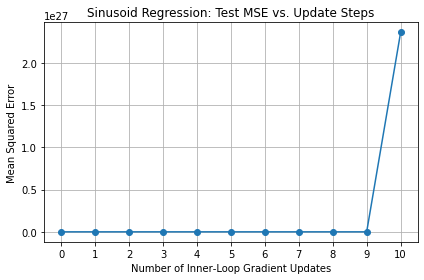

In [ ]:

# Plot
plt.figure()
plt.errorbar(update_steps, means, yerr=ci95, fmt='-o')
plt.xlabel('Number of Inner‑Loop Gradient Updates')
plt.ylabel('Mean Squared Error')
plt.title('Sinusoid Regression: Test MSE vs. Update Steps')
plt.xticks(update_steps)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# wtf ??
# turns out, older tf version had something that enabled more native stability
# newer versions don't, so we see an explosion in the loss in later grad updates

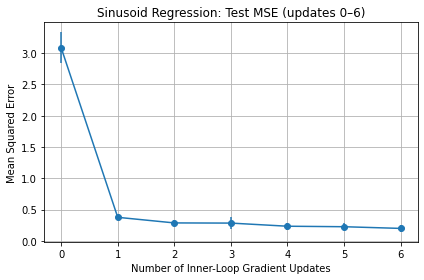

In [ ]:
exp_folder = 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.01nonorm'
csv_path = os.path.join(exp_folder, 'test_ubs10_stepsize0.01.csv')

# load
df = pd.read_csv(csv_path)

# extract
steps = [int(c.replace('update','')) for c in df.columns]
means = df.iloc[0].values
ci95  = df.iloc[2].values

# trim to steps 0–6
mask = [s<=6 for s in steps]
trim_steps = [s for s,m in zip(steps,mask) if m]
trim_means = [m for m,msk in zip(means,mask) if msk]
trim_ci95  = [c for c,msk in zip(ci95,mask) if msk]

# plot
#set the background color to white
plt.figure()
plt.gcf().patch.set_facecolor('white')
plt.errorbar(trim_steps, trim_means, yerr=trim_ci95, fmt='-o')
plt.xlabel('Number of Inner-Loop Gradient Updates')
plt.ylabel('Mean Squared Error')
plt.title('Sinusoid Regression: Test MSE (updates 0–6)')
plt.xticks(trim_steps)
plt.grid(True)
plt.tight_layout()
plt.savefig('sine_regression_updates_0-6.png')

plt.show()

In [ ]:
# looks about right through the first 6 updates

In [10]:
import tensorflow as tf
print ("TensorFlow version: ", tf.__version__)

TensorFlow version:  1.15.0


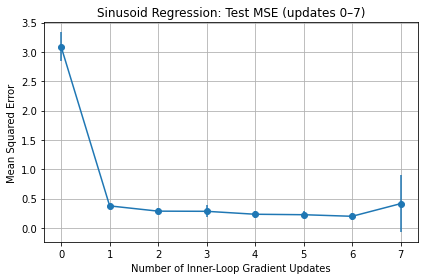

In [ ]:
exp_folder = 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.01nonorm'
csv_path = os.path.join(exp_folder, 'test_ubs10_stepsize0.01.csv')

# load
df = pd.read_csv(csv_path)

# extract
steps = [int(c.replace('update','')) for c in df.columns]
means = df.iloc[0].values
ci95  = df.iloc[2].values

# trim to steps 0–7
mask = [s<=7 for s in steps]
trim_steps = [s for s,m in zip(steps,mask) if m]
trim_means = [m for m,msk in zip(means,mask) if msk]
trim_ci95  = [c for c,msk in zip(ci95,mask) if msk]

# plot
#set the background color to white
plt.figure()
plt.gcf().patch.set_facecolor('white')
plt.errorbar(trim_steps, trim_means, yerr=trim_ci95, fmt='-o')
plt.xlabel('Number of Inner-Loop Gradient Updates')
plt.ylabel('Mean Squared Error')
plt.title('Sinusoid Regression: Test MSE (updates 0–7)')
plt.xticks(trim_steps)
plt.grid(True)
plt.tight_layout()
plt.savefig('sine_regression_updates_0-7.png')

plt.show()

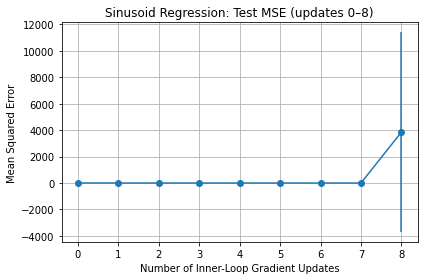

In [ ]:
# point this to wherever your logdir lives:
exp_folder = 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.01nonorm'
csv_path = os.path.join(exp_folder, 'test_ubs10_stepsize0.01.csv')

# load
df = pd.read_csv(csv_path)

# extract
steps = [int(c.replace('update','')) for c in df.columns]
means = df.iloc[0].values
ci95  = df.iloc[2].values

# trim to steps 0–8
mask = [s<=8 for s in steps]
trim_steps = [s for s,m in zip(steps,mask) if m]
trim_means = [m for m,msk in zip(means,mask) if msk]
trim_ci95  = [c for c,msk in zip(ci95,mask) if msk]

# plot
#set the background color to white
plt.figure()
plt.gcf().patch.set_facecolor('white')
plt.errorbar(trim_steps, trim_means, yerr=trim_ci95, fmt='-o')
plt.xlabel('Number of Inner-Loop Gradient Updates')
plt.ylabel('Mean Squared Error')
plt.title('Sinusoid Regression: Test MSE (updates 0–8)')
plt.xticks(trim_steps)
plt.grid(True)
plt.tight_layout()
plt.savefig('sine_regression_updates_0-8.png')

plt.show()

In [ ]:
# really begins to explode at 8